## Questão 2: Clustering com K-Means e Silhouette

Você tem um dataset com as seguintes características normalizadas de clientes:

- Cliente 1: [0.5, 0.7]
- Cliente 2: [0.2, 0.1]
- Cliente 3: [0.9, 0.8]
- Cliente 4: [0.4, 0.6]
- Cliente 5: [0.3, 0.2]

### Perguntas Práticas:

1. Aplique o algoritmo K-Means para agrupar os clientes em 2 clusters.
2. Calcule a distância média intra-cluster e inter-cluster.
3. Utilize o coeficiente de silhouette para determinar se 2 ou 3 clusters são melhores.
4. Com base no coeficiente de silhouette, indique qual o número ideal de clusters.

Silhouette Score: 0.5656359883423918


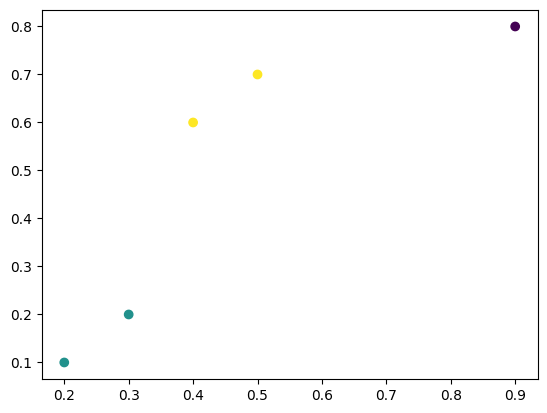

In [13]:
#Pergunta 1
#Resolucao
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset
X = np.array([[0.5, 0.7],
              [0.2, 0.1],
              [0.9, 0.8],
              [0.4, 0.6],
              [0.3, 0.2]])

# K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=1)

from sklearn.metrics import silhouette_score
print('Silhouette Score:', silhouette_score(X, kmeans.labels_))




In [14]:
# Calcule a distância média intra-cluster e inter-cluster.

# Intra-cluster
intra_cluster = 0
for i in range(len(X)):
    for j in range(len(X)):
        if kmeans.labels_[i] == kmeans.labels_[j]:
            intra_cluster += np.linalg.norm(X[i] - X[j])
intra_cluster /= len(X)

# Inter-cluster
inter_cluster = 0
for i in range(len(X)):
    for j in range(len(X)):
        if kmeans.labels_[i] != kmeans.labels_[j]:
            inter_cluster += np.linalg.norm(X[i] - X[j])
inter_cluster /= len(X)

In [16]:
#Pergunta 3
#Resolucao
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[0.5, 0.7],
              [0.2, 0.1],
              [0.9, 0.8],
              [0.4, 0.6],
              [0.3, 0.2]])

# K-Means
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)

from sklearn.metrics import silhouette_score
print('Silhouette Score 2 clusters:', silhouette_score(X, kmeans.labels_))
print('Silhouette Score 3 clusters:', silhouette_score(X, kmeans3.labels_))

#3 clusters tem um silhouette score maior que 2 clusters, logo é melhor

Silhouette Score 2 clusters: 0.294073076010036
Silhouette Score 3 clusters: 0.5656359883423918


### Perguntas Teóricas:

1. **O que é o algoritmo K-Means e como ele funciona?**
   - Resposta: K-Means é um algoritmo de clustering que agrupa os dados em \(k\) clusters, minimizando a soma das distâncias quadradas entre os pontos e os centros dos clusters. Ele funciona iterativamente, escolhendo \(k\) centros iniciais, atribuindo cada ponto ao centro mais próximo e recalculando os centros até que não haja mais mudanças nas atribuições.

2. **Explique o conceito de coeficiente de silhouette e sua aplicação.**
   - Resposta: O coeficiente de silhouette mede o quão bem cada ponto está agrupado em relação ao seu cluster e a outros clusters. O valor varia entre -1 e 1, sendo que valores próximos de 1 indicam um bom agrupamento. É usado para avaliar a qualidade do clustering, ajudando a escolher o número ótimo de clusters.

3. **Por que a normalização dos dados é importante antes de aplicar K-Means?**
   - Resposta: A normalização é importante porque o K-Means é sensível à escala dos dados. Sem normalizar, variáveis com maior amplitude podem dominar a distância euclidiana, resultando em clusters desequilibrados ou incorretos.